# 10. Datos para entrenar redes neuronales
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


### Datos

In [2]:
from google.colab import files
# se debe cargar el fichero “cats_and_dogs_small.zip”
files.upload()

Saving cats_and_dogs_small.zip to cats_and_dogs_small.zip


In [0]:
!ls

In [0]:
import os
import zipfile

local_zip = '/content/cats_and_dogs_small.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()


In [0]:

base_dir = '/content/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')



In [0]:
train_cat_fnames = os.listdir( train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])


In [0]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))


In [0]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def print_pictures(dir, fnames):
  # presentaremos images en una configuración de 4x4
  nrows = 4
  ncols = 4

  pic_index = 0 # Índice para iterar sobre las imagenes

  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  pic_index+=8

  next_pix = [os.path.join(dir, fname) 
                for fname in fnames[ pic_index-8:pic_index] 
               ]

  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

  
print("Figura 10.3")
print_pictures(train_cats_dir, train_cat_fnames)
print("Figura 10.4")
print_pictures(train_dogs_dir, train_dog_fnames)
print("Figura 10.5")
print_pictures(validation_cats_dir, validation_cat_fnames)
print("Figura 10.6")
print_pictures(validation_dogs_dir, validation_dog_fnames)
print("Figura 10.7")
print_pictures(test_cats_dir, test_cat_fnames)
print("Figura 10.8")
print_pictures(test_dogs_dir, test_dog_fnames)

## Modelo básico

In [0]:
import tensorflow as tf
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

In [0]:

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics = ['acc'])


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



In [0]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)


In [0]:
history = model.fit(
      train_generator,
      steps_per_epoch= steps_per_epoch,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps= validation_steps,  
      verbose=2)



In [0]:
history_dict = history.history
print(history_dict.keys())

In [0]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_loss ,  'b', label='Validation acc' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()




In [0]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

  ...
    to  
  ['...']
50/50 [==============================] - 3s 57ms/step - loss: 2.8565 - acc: 0.7320
Test Accuracy: 0.732


In [0]:
history_dict = history.history
print(history_dict.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Saving Wiliams-foto1.png to Wiliams-foto1 (4).png
[[8.649538e-36]]


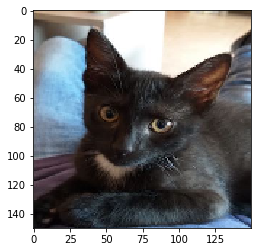

Wiliams-foto1.png IS A DOG


In [0]:
import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()
file=list(uploaded.keys())[0]

path='/content/' + file
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)  

classes = model.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0: print( fn + " IS A DOG")
else: print( fn + " IS A CAT")